<table> <tr>
        <td  style="background-color:#ffffff;"><a href="https://qworld.net/index.php/qworld/" target="_blank"><img src="../images/qworld.jpg" width="25%" align="left"></a></td>
        <td  style="background-color:#ffffff;vertical-align:bottom;">
            prepared by Abuzer Yakaryilmaz (<a href="https://qworld.net/index.php/qlatvia/" target="_blank">QLatvia</a>) and <br> Maksim Dimitrijev(<a href="https://qworld.net/index.php/qlatvia/" target="_blank">QLatvia</a>) 
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

# Qiskit, Qutip installation and test


<hr id="install">

## Install Qiskit

Type

    !pip install "qiskit[visualization]"
    
directly inside the cell of a Jupyter notebook.


You may also visit the following links for further information.

- https://github.com/Qiskit/qiskit-tutorials/blob/master/INSTALL.md

- https://pypi.org/project/qiskit/0.15.0/

__*Restart the kernel*__ (check "Kernel" menu) to apply the changes to the current notebook.

<hr id="install2">

## Install QuTiP

Type

    !pip install qutip
    
directly inside the cell of a Jupyter notebook.
    
For a workaround without pip you may execute the following commands in the Anaconda terminal:
<ul>
    <li>conda create -n qutip-env</li>
    <li>conda config --append channels conda-forge</li>
    <li>conda install qutip</li>
</ul>

<hr id="check">

## Check Qiskit installation



In [2]:
import qiskit
versions = qiskit.__version__
print("The version of Qiskit is",versions)

The version of Qiskit is 2.3.0


<hr id="example">

## Execute an example program


1) Create a quantum circuit

In [3]:
# import the objects from qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from random import randrange

# create a quantum circuit and its register objects
qreg = QuantumRegister(2) # quantum register with two quantum bits
creg = ClassicalRegister(2) # classical register with two classical bits
circuit = QuantumCircuit(qreg,creg) # quantum circuit composed by a quantum register and a classical register

# apply a Hadamard gate to the first qubit
circuit.h(qreg[0])

# set the second qubit to state |1>
circuit.x(qreg[1])

# apply CNOT(first_qubit,second_qubit)
circuit.cx(qreg[0],qreg[1])

# measure the both qubits
circuit.measure(qreg,creg)

print("The execution of the cell was completed, and the circuit was created :)")

The execution of the cell was completed, and the circuit was created :)


2) Draw the circuit

_Run the cell once more if the figure is not shown_

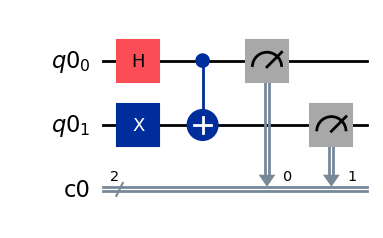

In [4]:
# draw circuit 
circuit.draw(output='mpl')

# the output will be a "matplotlib.Figure" object

3) Execute the circuit 1024 times in the local simulator and print the observed the outcomes

In [5]:
## execute the circuit 1024 times
job = AerSimulator().run(circuit,shots=1024)
# get the result
counts = job.result().get_counts(circuit)
print(counts)

{'10': 509, '01': 515}


4) Check QuTiP - draw a Bloch sphere

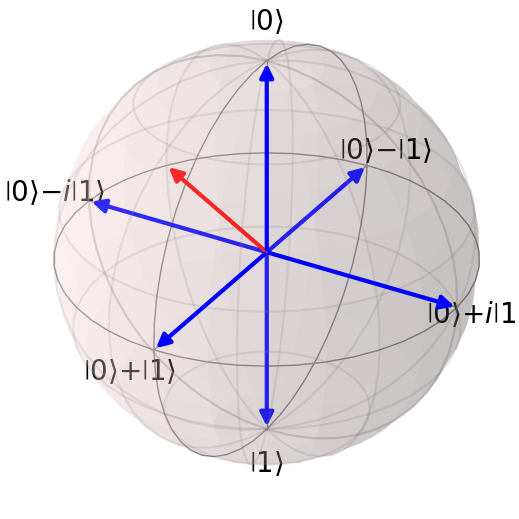

In [6]:
from qiskit.visualization import plot_bloch_vector, bloch
from matplotlib.pyplot import text
from math import pi, cos, sin
from qutip import *

theta = pi/2
phi = 4*pi/3

x = sin(theta)*cos(phi)
y = sin(theta)*sin(phi)
z = cos(theta)

sphere = bloch
sphere.Bloch
b = Bloch()
b.ylpos = [1.1, -1.2]
b.xlabel = ['$\\left|0\\right>+\\left|1\\right>$', '$\\left|0\\right>-\\left|1\\right>$']
b.ylabel = ['$\\left|0\\right>+i\\left|1\\right>$', '$\\left|0\\right>-i\\left|1\\right>$']
b.vector_color = ['b','b','b','b','b','b','r']
b.add_vectors([[0,0,1],[0,0,-1],[0,1,0],[0,-1,0],[1,0,0],[-1,0,0]])
b.add_vectors([x,y,z])
b.show()

# re-execute this cell if you DO NOT see the Bloch sphere